# Before starting
- you can find the data from Kaggel : https://www.kaggle.com/datasets/anujachintyabiswas/attrition-rate-of-a-company
- all vis you can find in github : 
- there is no data discription 

### We need to find answer for these questions:
1- Ratio of Attrition based on the following factors
- Gender
- Job Satisfaction Level
- Work Life Balance

2- Which age group shows a higher attrition rate

3- Predictive Analysis

- You are required to model the probability of attrition using an analytical technique.
- Identify the technique and why you are using that technique.
- Analyse the given data to identify the major reasons for attrition
- Advise suggestions to curb the attrition
- The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay



In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from PIL import Image
import urllib.request

In [38]:
df = pd.read_csv("Desktop/general_data.csv", thousands=" ")

In [39]:
df = df.drop_duplicates()

In [40]:
columns_df = df.columns

In [41]:
columns_df

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [42]:
# check is there null values
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [43]:
df = df.dropna()

In [44]:
df

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,29,No,Travel_Rarely,Sales,4,3,Other,1,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [45]:
df.isna().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [46]:
df.info()
df_converted = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   BusinessTravel           4300 non-null   object 
 4   Department               4300 non-null   object 
 5   DistanceFromHome         4300 non-null   int64  
 6   Education                4300 non-null   int64  
 7   EducationField           4300 non-null   object 
 8   EmployeeCount            4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [47]:
#figure out is the values is int or float 
df.WorkLifeBalance.value_counts()

# it lookes that most columns as type float is  categorical lets change it to int
for x in df.columns :
    if df[x].dtype== np.float64:
      df_converted[x] = df[x].astype("int64")
    else :
            df_converted[x] = df[x]

In [48]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               4300 non-null   int64 
 1   Age                      4300 non-null   int64 
 2   Attrition                4300 non-null   object
 3   BusinessTravel           4300 non-null   object
 4   Department               4300 non-null   object
 5   DistanceFromHome         4300 non-null   int64 
 6   Education                4300 non-null   int64 
 7   EducationField           4300 non-null   object
 8   EmployeeCount            4300 non-null   int64 
 9   Gender                   4300 non-null   object
 10  JobLevel                 4300 non-null   int64 
 11  JobRole                  4300 non-null   object
 12  MaritalStatus            4300 non-null   object
 13  MonthlyIncome            4300 non-null   int64 
 14  NumCompaniesWorked       4300 non-null  

In [49]:
#let's get all possipall values of each column
col_df_con = df_converted.columns
col_df_con

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [50]:
for x in col_df_con :
   print( x ,df_converted[x].unique(), "  ","\n");

EmployeeID [   1    2    3 ... 4407 4408 4409]    

Age [51 31 32 38 46 28 29 25 45 55 47 37 21 35 26 50 53 44 49 36 42 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]    

Attrition ['No' 'Yes']    

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']    

Department ['Sales' 'Research & Development' 'Human Resources']    

DistanceFromHome [ 6 10 17  2  8 11 18  1  7 14  3 16  9  5  4 20 29 15 13 24 19 28 22 25
 21 26 27 12 23]    

Education [2 1 4 5 3]    

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']    

EmployeeCount [1]    

Gender ['Female' 'Male']    

JobLevel [1 4 3 2 5]    

JobRole ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']    

MaritalStatus ['Married' 'Single' 'Divorced']    

MonthlyIncome [131160  41890 193280 ...  32020  36810 173990

In [51]:
# drop columns that have one value and EmployeeID 
df_converted = df_converted.drop(["Over18", "StandardHours", "EmployeeCount", "EmployeeID"],axis=1)

In [52]:
df_converted

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,6,1,0,0,3,4,2,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6,3,5,1,4,3,2,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5,2,5,0,3,2,2,1,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13,5,8,7,5,4,4,3,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,6,2,6,1,5,3,4,3,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10,5,3,0,2,4,1,3,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10,2,3,0,2,4,4,3,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5,4,4,1,2,1,3,3,3,4


### # All vis made by POWER BI  tool


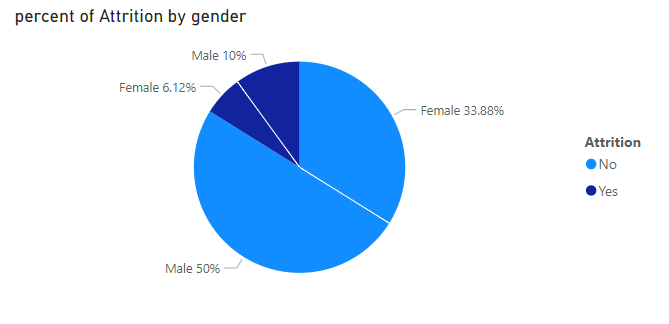

In [110]:
# let's first awnsering the frst question
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/01.PNG?raw=true","01.PNG")
Percent_Attrition_By_Gender = Image.open("01.PNG")
Percent_Attrition_By_Gender

### The First Conclutoin
- most of the employees are male 60% and 40% females 
- males have 10% of yes attrition but females less so the first solution  is hiring males more than females 
- because if we do this calculation [(male%(no) / male%(yes)) = (females%(no) / females&(yes))] we will find that  5 (male) = 5.535(females)
- i know there is a littel diffrence but i'm trying to reduce the yes attrition 

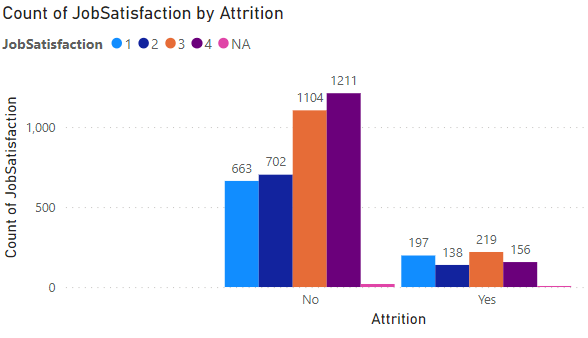

In [112]:
# let's check the socond question
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/02.PNG?raw=true","02.PNG")
Count_of_JobSatisfaction_by_Attrition = Image.open("02.PNG")
Count_of_JobSatisfaction_by_Attrition

- from vis we can find out that Jobsatisfacation has no effect on Attrition

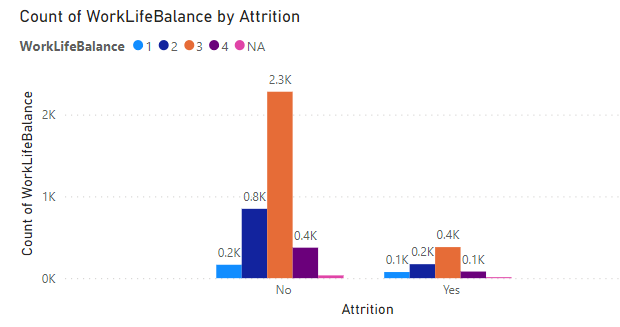

In [113]:
# let's check the third question
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/03.PNG?raw=true","03.PNG")
Count_of_WorkLifeBalance_by_Attrition = Image.open("03.PNG")
Count_of_WorkLifeBalance_by_Attrition

- from vis i think work life balance has no effect to attrition because they have the same pattern but attrition(yes) has larger scale than attrition(no)

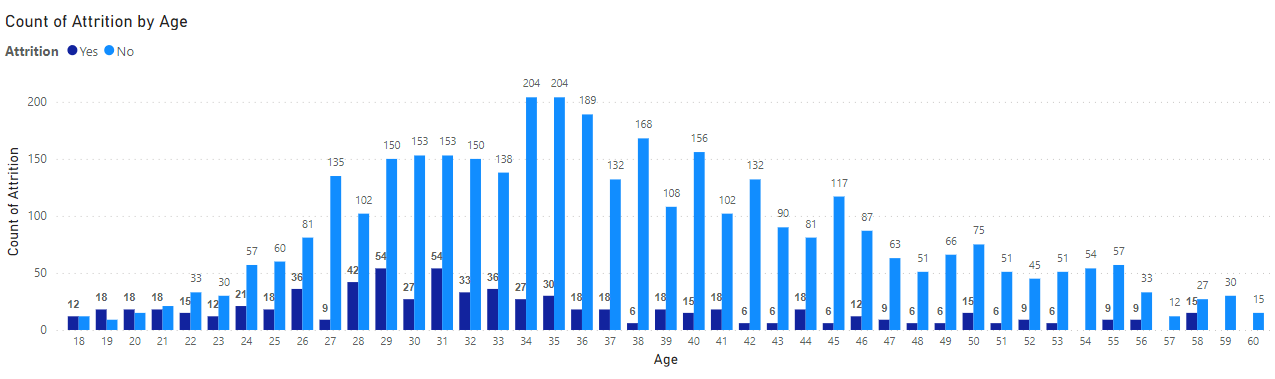

In [114]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/04.PNG?raw=true","04.PNG")
Count_of_Attrition_by_Age = Image.open("04.PNG")
Count_of_Attrition_by_Age

- from vis i think emplotees that have age between 24 to 35 have attrition 
- 28 , 29 and 31 ages  are the highest in yes attrition

In [57]:
df_converted.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,2.066977,65059.844186,2.690000,15.210698,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,9.146517,8.097059,1.024774,1.106633,47045.398914,2.495764,3.662777,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.000000,29260.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2.000000,49360.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83802.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


- from describe function i find that most of our data are not dispersion

In [58]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4300 non-null   int64 
 1   Attrition                4300 non-null   object
 2   BusinessTravel           4300 non-null   object
 3   Department               4300 non-null   object
 4   DistanceFromHome         4300 non-null   int64 
 5   Education                4300 non-null   int64 
 6   EducationField           4300 non-null   object
 7   Gender                   4300 non-null   object
 8   JobLevel                 4300 non-null   int64 
 9   JobRole                  4300 non-null   object
 10  MaritalStatus            4300 non-null   object
 11  MonthlyIncome            4300 non-null   int64 
 12  NumCompaniesWorked       4300 non-null   int64 
 13  PercentSalaryHike        4300 non-null   int64 
 14  StockOptionLevel         4300 non-null  

In [59]:
col = ["Attrition", "BusinessTravel","Department", "EducationField", "Gender", "JobRole", "MaritalStatus" ]
encoder = LabelEncoder()
for col in df_converted.columns:
    df_converted[col] = encoder.fit_transform(df_converted[col])

In [60]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4300 non-null   int64
 1   Attrition                4300 non-null   int32
 2   BusinessTravel           4300 non-null   int32
 3   Department               4300 non-null   int32
 4   DistanceFromHome         4300 non-null   int64
 5   Education                4300 non-null   int64
 6   EducationField           4300 non-null   int32
 7   Gender                   4300 non-null   int32
 8   JobLevel                 4300 non-null   int64
 9   JobRole                  4300 non-null   int32
 10  MaritalStatus            4300 non-null   int32
 11  MonthlyIncome            4300 non-null   int64
 12  NumCompaniesWorked       4300 non-null   int64
 13  PercentSalaryHike        4300 non-null   int64
 14  StockOptionLevel         4300 non-null   int64
 15  Tota

<AxesSubplot:>

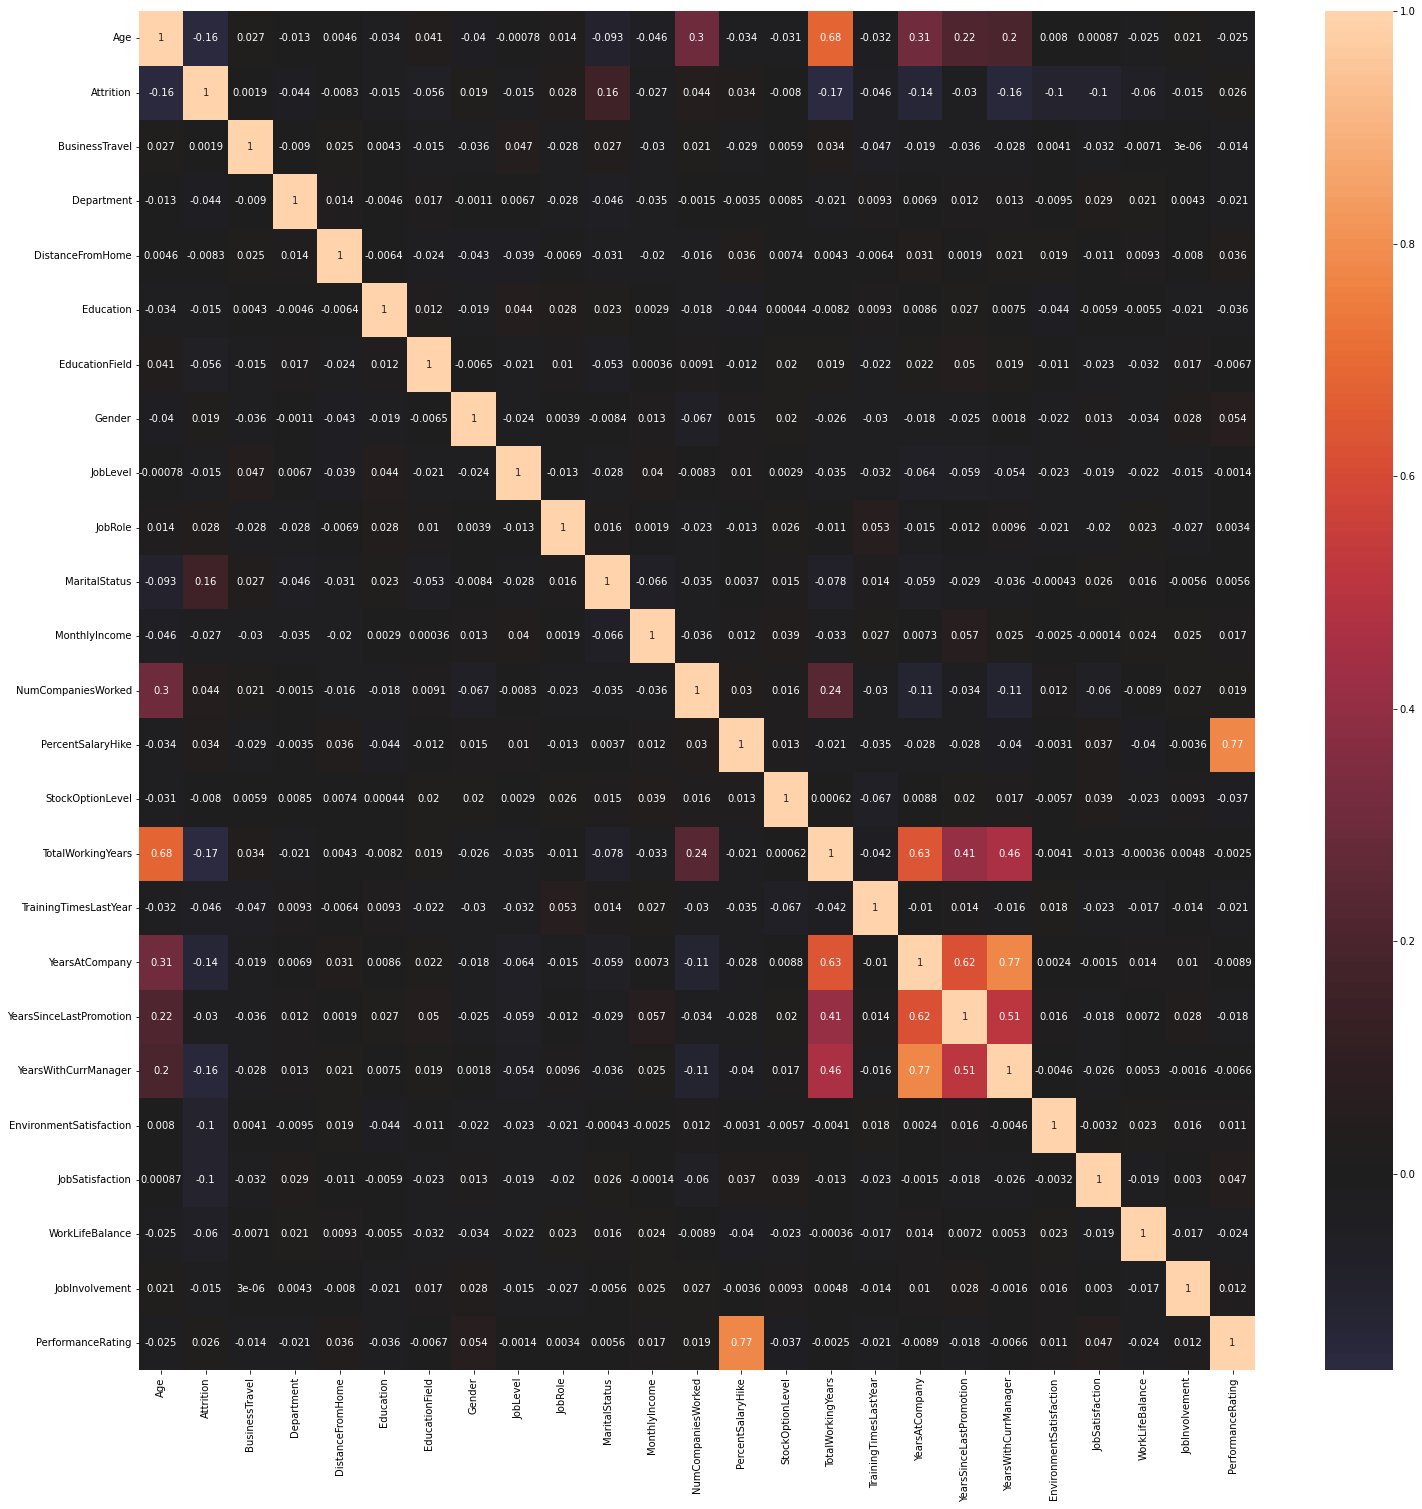

In [61]:
#correlation matrix 
df_corr = df_converted.corr()
plt.figure(figsize=(25,25))
#plot 
sns.heatmap(data=df_corr, annot=True, center=0,)

-from correlation matrix most of data are not correlated to Attrition column 

### let's use t-test to ckeck whether the columns is different or not

In [62]:
p = {}
stat = {}
for x in df_converted.columns:
    group1 = df_converted.where(df_converted.Attrition==0).dropna()[x]
    group2 = df_converted.where(df_converted.Attrition==1).dropna()[x]
    stat[x], p[x] = st.ttest_ind(group1,group2)
    if p[x] > 0.05: 
        print(x," ",p[x]," there is no relationship----------------------0")
    else:
         print(x," ",p[x]," there is relationship")
   
ttests = pd.DataFrame.from_dict(p,orient="Index")    


Age   1.0459177113370528e-24  there is relationship
Attrition   0.0  there is relationship
BusinessTravel   0.9014927609791149  there is no relationship----------------------0
Department   0.0035483235205413135  there is relationship
DistanceFromHome   0.5857262212670618  there is no relationship----------------------0
Education   0.3178316054352794  there is no relationship----------------------0
EducationField   0.0002632604020694099  there is relationship
Gender   0.22207277112863344  there is no relationship----------------------0
JobLevel   0.3389096033955279  there is no relationship----------------------0
JobRole   0.06257965517919607  there is no relationship----------------------0
MaritalStatus   2.1100924122288145e-26  there is relationship
MonthlyIncome   0.07933192355770897  there is no relationship----------------------0
NumCompaniesWorked   0.0039766452810937125  there is relationship
PercentSalaryHike   0.023980569178786482  there is relationship
StockOptionLevel   0.601

- from t-test i find that :
  ( BusinessTravel , DistanceFromHome , Education , Gender , JobLevel , JobRole, MonthlyIncome, StockOptionLevel ,      JobInvolvement   ,   PerformanceRating  ) there are not relateded to the data 
- so i will drop them

In [63]:
df_converted = df_converted.drop(['BusinessTravel' , 'DistanceFromHome' , 'Education' , 'Gender' , 'JobLevel' , 'JobRole', 'MonthlyIncome', 'StockOptionLevel' , 'JobInvolvement' , 'PerformanceRating'],axis=1)

In [64]:
# the dataset in not balanced
df_converted.Attrition.value_counts()

0    3605
1     695
Name: Attrition, dtype: int64

In [65]:
# split the dataset to 0's and 1's
class_1 = df_converted[df_converted["Attrition"]==1]
class_0 = df_converted[df_converted["Attrition"]==0]
# get only 695 of 0's 
class_0 = class_0.sample(695)

In [66]:
#conat the data
df_converted_new = pd.concat([class_1,class_0],axis=0)
# shaffel the data 
df_converted_new = df_converted_new.sample(frac=1)
df_converted_new

,Age,Attrition,Department,EducationField,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
221,6,1,1,3,1,1,10,6,3,6,1,2,0,2,2
3414,12,1,1,3,2,0,0,4,3,3,1,2,1,1,2
3727,22,0,1,1,0,2,7,8,3,3,1,2,2,2,3
2205,7,0,1,1,1,2,2,6,2,3,1,2,0,2,1
4176,16,1,2,2,2,2,2,8,2,4,1,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,21,0,2,3,1,0,0,21,3,20,9,6,1,3,1
3740,16,1,1,3,2,0,4,16,2,15,10,10,0,1,3
2368,22,0,1,1,1,1,3,18,2,18,14,12,0,2,2
2254,26,0,1,1,2,3,7,7,4,5,0,3,2,2,2


In [67]:
# get the data ready for pridicting
x = df_converted_new.drop("Attrition", axis=1)
y = df_converted_new["Attrition"]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=1001)

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=1)
model.fit( x_train, y_train)
model.score(x_test, y_test)

0.6171338461538461

### the score is not the best so i will :
- adjust the hyperparamter
- reduce the number of colums 
- trying aother model 

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
grid = {"n_estimators" : [10,100,200,500,1000,1200],
        "max_depth" : [None,5,10,20,30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2,4,6],
        "min_samples_leaf" : [1,2,3]
       }
rs_reg = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=50, cv=5,verbose=2 )
rs_reg.fit(x_train, y_train)
rs_reg.best_params_
rs_reg_preds = rs_reg.predict(x_test)
acc = mean_squared_error(y_test, rs_reg_preds)
acc

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   3.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   2.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, 

0.09234537149706155

- oohhhhhhhhhh 0.09 mean squared error very good
- hint : try to minimize MSE 

# Notic something
- i wonder something the manger want Predictive Analysis but the Attrition is discrete not continous so it is not predictive 
it is classcification analysis

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8976034858387799

- the score is good but not the best so let's adjust the hyperprameters 

In [74]:
from sklearn.metrics import accuracy_score
rs_reg = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=50, cv=5,verbose=2 )
rs_reg.fit(x_train, y_train)
rs_reg.best_params_
rs_reg_preds = rs_reg.predict(x_test)
acc = accuracy_score(y_test, rs_reg_preds)
acc

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; 

0.8779956427015251

- i think it's good because it's above 0.85 
- why i used 'accuracy_score' the dataset is balanced
- i choosed this model depending on chooseing the right estimater page in sklearn website

# these are the columns that affect on Attriton value
Age  
Attrition  
Department  
EducationField  
MaritalStatus  
NumCompaniesWorked  
PercentSalaryHike  
TotalWorkingYears  
TrainingTimesLastYear  
YearsAtCompany  
YearsSinceLastPromotion  
YearsWithCurrManager  
EnvironmentSatisfaction  
JobSatisfaction  
WorkLifeBalance  
- so let's focus in which employees go out from the company
- then why they out

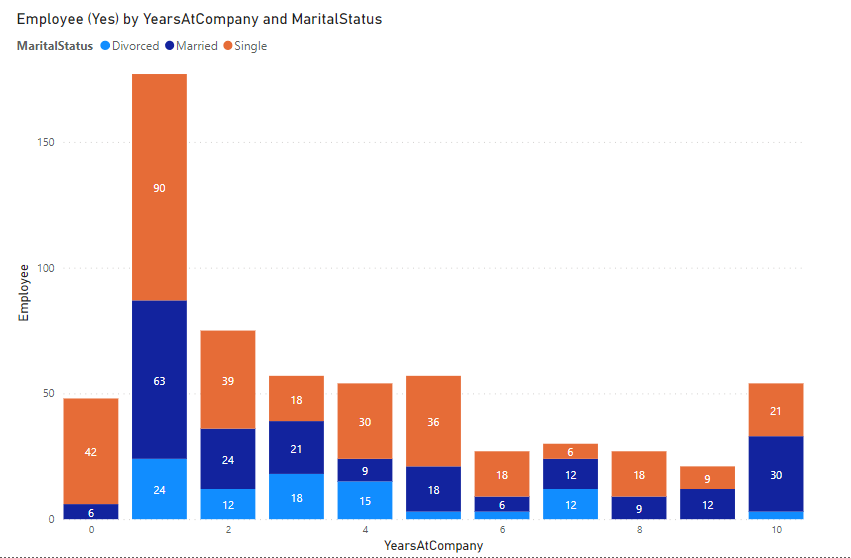

In [115]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/05.PNG?raw=true","05.PNG")
Employees_yes_years_at_company = Image.open("05.PNG")
Employees_yes_years_at_company

- this graph contains all the employees that are out and their marital status and their years at the company 
- And explain that :
   - most of yes employees are single and married
   - we can't judge that the are jonir or senior  
- now we answer the question  which employees go out from the company
- then we need to know why they leave 

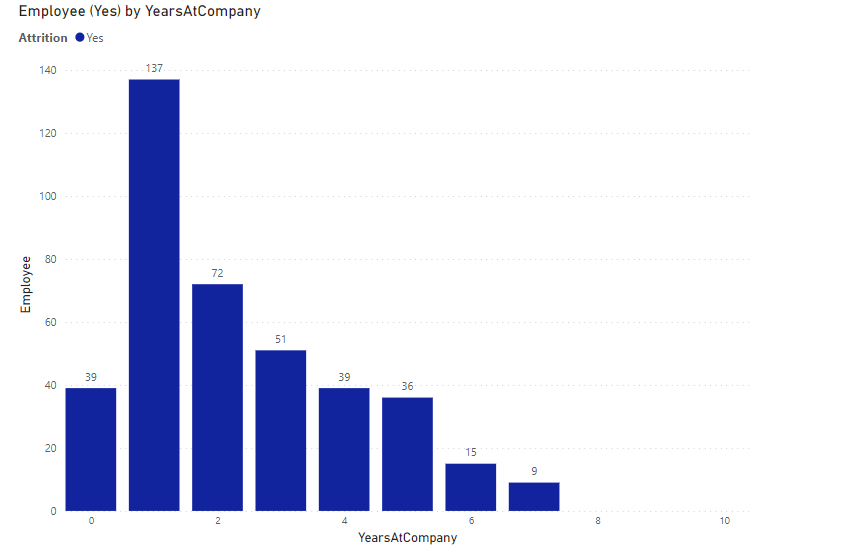

In [116]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/06.PNG?raw=true", "06.PNG")
Employees_from_0_to_7_exp=Image.open("06.PNG")
Employees_from_0_to_7_exp

- this graph explain the number of employees that are have 0 to 7 experiance that are out 
    - so that more than 57% are jonir and senior 
    - i don't know some of them are fired or they leave because all of them have rating between 3 to 4 
- now let's focus on why the leave

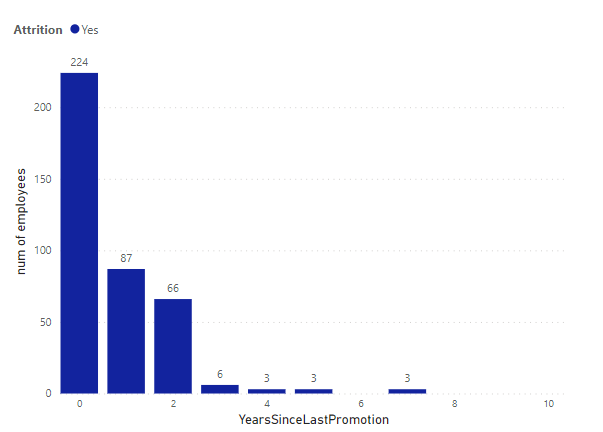

In [117]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/07.PNG?raw=true","07.PNG")
Years_since_last_promotion = Image.open("07.PNG")
Years_since_last_promotion

- most of them are get prometed after 0 to 2 years 
- why they out when they just get promoted 
- this is really confusing

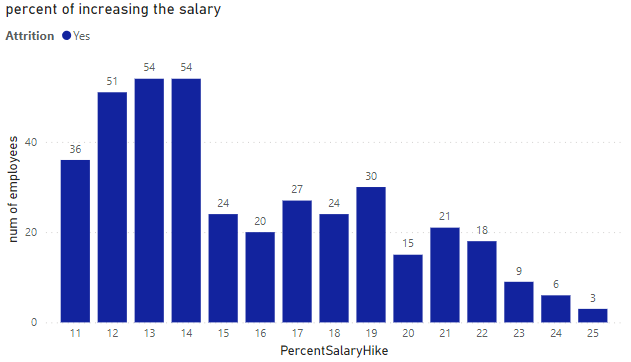

In [118]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/08.PNG?raw=true","08.PNG")
Percent_of_increasing_the_salary = Image.open("08.PNG")
Percent_of_increasing_the_salary

- the present is so low the manger need to increase the percent 
- now we know why they leave after promoting

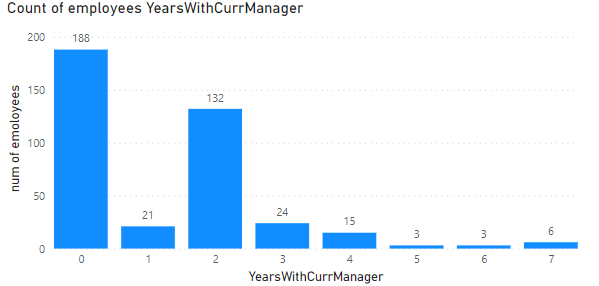

In [119]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/09.PNG?raw=true","09.PNG")
Count_of_employees_YearsWithCurrManager = Image.open("09.PNG")
Count_of_employees_YearsWithCurrManager

- i think the teamleader need to change or their behave with the team

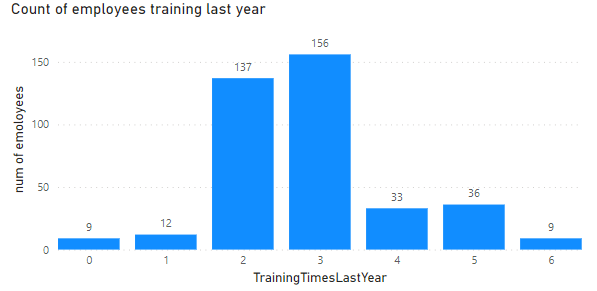

In [120]:
urllib.request.urlretrieve("https://github.com/fares-ramoun/fares-ramoun-fares-ramoun-Analyzing-the-Attrition-Rate-of-a-Company---IN-PYTHON-/blob/main/analysis%20vis/010.PNG?raw=true","010.PNG")
Employees_training_times_last_year = Image.open("010.PNG")
Employees_training_times_last_year

- most of them leave after the second and the thired traning 
- maybe they get boring after this period or they find that they are not capable to the job but i suggest the first one because   they already hired and have all qulifications 

# The Conclution :
1- most of yes employees are single and married

2- more than 57% are jonir and senior are leaving

3- most of them are get prometed after 0 to 2 years 

4- the present of salary hike is so low

5- there is a problem with teamleader speacialy thier behave

6- most of them leave after the second and the thired traning

7- Jobsatisfacation has no effect on Attrition

8- life balance has no effect to attrition

# My Suggestions :
1- manger need to increase the percent of salary hike

2- key eyes on the teamleaders and thier behaver

3- try to reduce the training time

4- hire males more than females (not recism) or hire employees whose marital status married

hint : i am just jonir data analyst , i did this project by my littel knowlage and sorry for mistakes 
if you want to hire me please contact me : ftsrxx@gmail.com